In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
df = pd.read_csv('amazon.csv')
df.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [3]:
df.shape

(20000, 2)

# **Data Preprocessing**

In [4]:
df.isnull().sum()

reviewText    0
Positive      0
dtype: int64

In [5]:
df.reviewText[1000]

'Original review: Good graphics, sounds and music make this my favourite jewel-matching game.  The fact that various match-ups and combinations give bonuses and time credits is a plus, but the sparkling jewels and other "eggs" (like ones that blow up surr'

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


In [7]:
df.reviewText[1000]

'Original review: Good graphics, sounds and music make this my favourite jewel-matching game.  The fact that various match-ups and combinations give bonuses and time credits is a plus, but the sparkling jewels and other "eggs" (like ones that blow up surr'

In [8]:
text =df.reviewText[1000].lower()
text

'original review: good graphics, sounds and music make this my favourite jewel-matching game.  the fact that various match-ups and combinations give bonuses and time credits is a plus, but the sparkling jewels and other "eggs" (like ones that blow up surr'

In [9]:
text = text.translate(str.maketrans('', '', string.punctuation))
text

'original review good graphics sounds and music make this my favourite jewelmatching game  the fact that various matchups and combinations give bonuses and time credits is a plus but the sparkling jewels and other eggs like ones that blow up surr'

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
tokens = word_tokenize(text)
tokens

['original',
 'review',
 'good',
 'graphics',
 'sounds',
 'and',
 'music',
 'make',
 'this',
 'my',
 'favourite',
 'jewelmatching',
 'game',
 'the',
 'fact',
 'that',
 'various',
 'matchups',
 'and',
 'combinations',
 'give',
 'bonuses',
 'and',
 'time',
 'credits',
 'is',
 'a',
 'plus',
 'but',
 'the',
 'sparkling',
 'jewels',
 'and',
 'other',
 'eggs',
 'like',
 'ones',
 'that',
 'blow',
 'up',
 'surr']

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]
tokens

['original',
 'review',
 'good',
 'graphics',
 'sounds',
 'music',
 'make',
 'favourite',
 'jewelmatching',
 'game',
 'fact',
 'various',
 'matchups',
 'combinations',
 'give',
 'bonuses',
 'time',
 'credits',
 'plus',
 'sparkling',
 'jewels',
 'eggs',
 'like',
 'ones',
 'blow',
 'surr']

In [14]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]
tokens

['original',
 'review',
 'good',
 'graphic',
 'sound',
 'music',
 'make',
 'favourite',
 'jewelmatching',
 'game',
 'fact',
 'various',
 'matchup',
 'combination',
 'give',
 'bonus',
 'time',
 'credit',
 'plus',
 'sparkling',
 'jewel',
 'egg',
 'like',
 'one',
 'blow',
 'surr']

In [16]:
processed_text = ' '.join(tokens)
processed_text

'original review good graphic sound music make favourite jewelmatching game fact various matchup combination give bonus time credit plus sparkling jewel egg like one blow surr'

In [17]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    #apply lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reassemble the text from the tokens
    processed_text = ' '.join(tokens)

    return processed_text

# Apply the preprocessing function to the 'reviewText' column
df['reviewText'] = df['reviewText'].apply(preprocess_text)

In [18]:
df.reviewText[1000]

'original review good graphic sound music make favourite jewelmatching game fact various matchup combination give bonus time credit plus sparkling jewel egg like one blow surr'

In [19]:
df.head()

,reviewText,Positive
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free lot different le...,1
2,really cool game bunch level find golden egg s...,1
3,silly game frustrating lot fun definitely reco...,1
4,terrific game pad hr fun grandkids love great ...,1


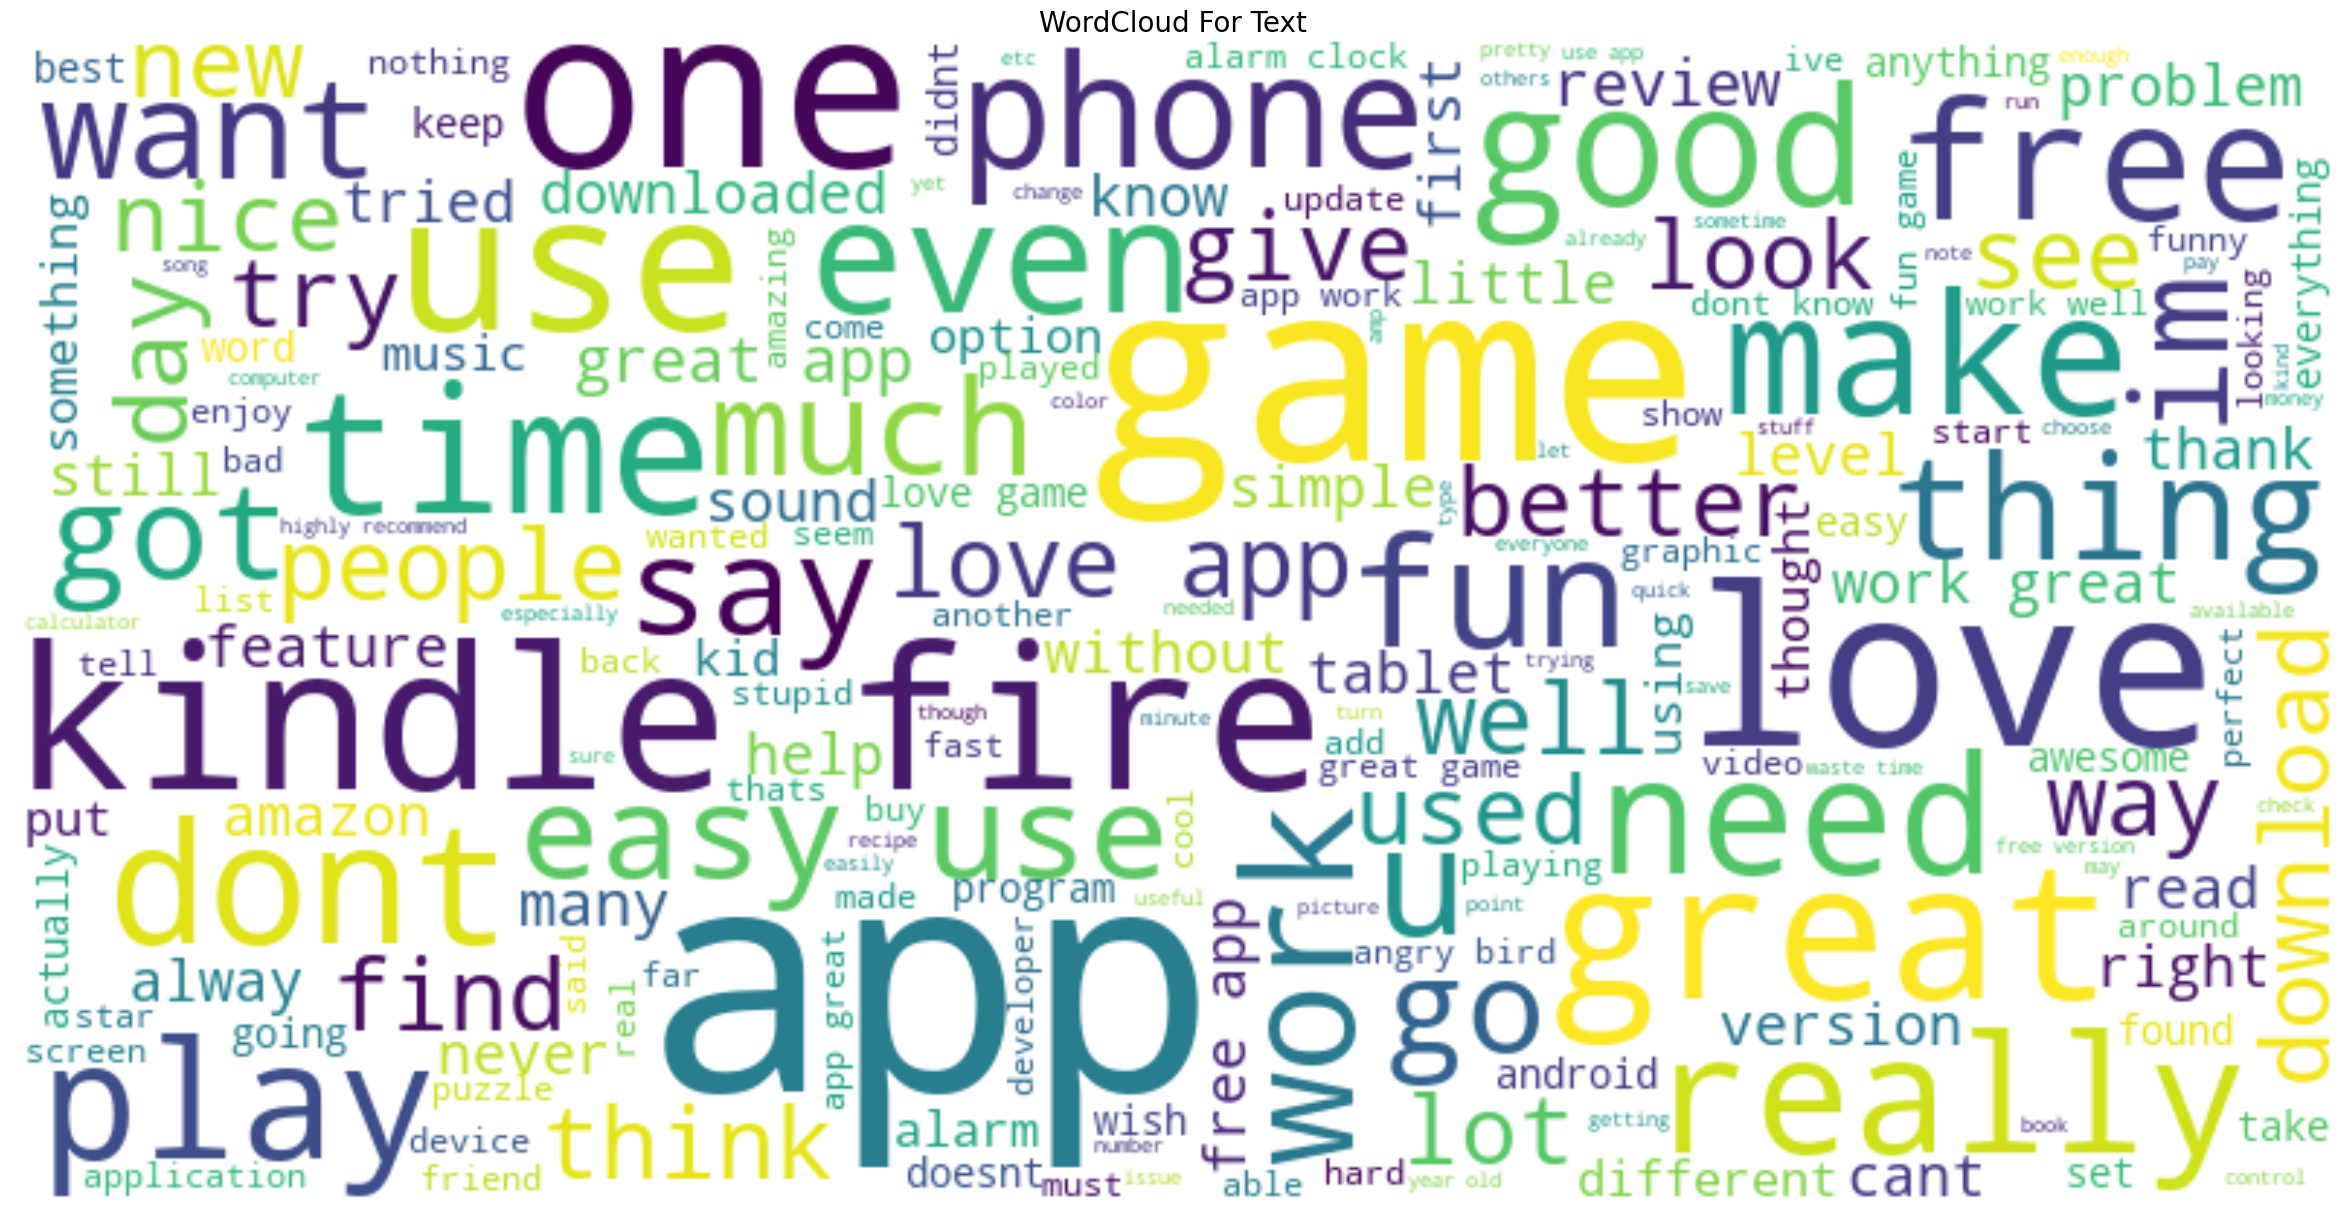

In [20]:
from wordcloud import WordCloud


# Assuming df is your DataFrame and 'reviewText' is the column containing text data
text_data = " ".join(df['reviewText'].astype(str))

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text_data)

# Plot the WordCloud
plt.figure(figsize=(30, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud For Text", fontsize=20)
plt.show()


In [21]:
df.shape

(20000, 2)

In [22]:
X = df.drop('Positive',axis=1)
y = df['Positive']

In [23]:
X.head()

,reviewText
0,one best apps acording bunch people agree bomb...
1,pretty good version game free lot different le...
2,really cool game bunch level find golden egg s...
3,silly game frustrating lot fun definitely reco...
4,terrific game pad hr fun grandkids love great ...


<Axes: >

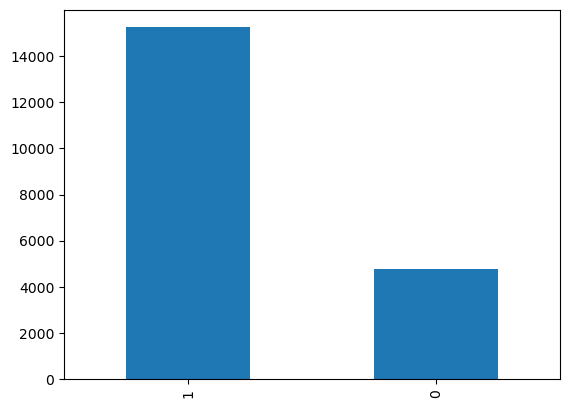

In [24]:
y.value_counts().plot(kind='bar')

# **Handle Imbalanced Data**

In [25]:

from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler(random_state=100)

X_new , y_new = over.fit_resample(X,y)

X_new.shape, y_new.shape

((30466, 1), (30466,))

<Axes: >

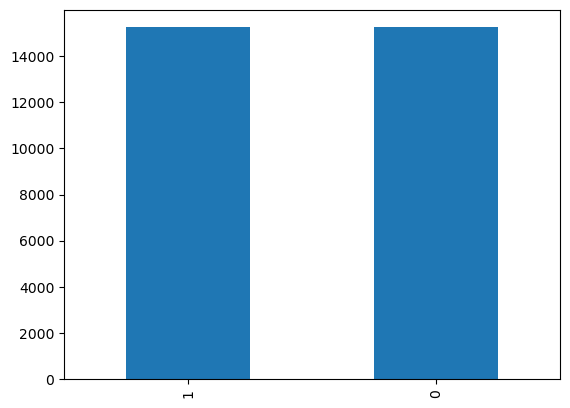

In [26]:
y_new.value_counts().plot(kind='bar')

# **Split Train_Test_Data**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24372, 1), (6094, 1), (24372,), (6094,))

# **TF-IDF Vectorize**

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['reviewText'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['reviewText'])

X_train_tfidf.shape, X_test_tfidf.shape


((24372, 19863), (6094, 19863))

# **Model Selection**

# **LogisticRegression**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_tfidf, y_train)

# Predictions on the testing set
logistic_predictions = logistic_model.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
print("\nEvaluation for Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Precision:", precision_score(y_test, logistic_predictions))
print("Recall:", recall_score(y_test, logistic_predictions))
print("F1 Score:", f1_score(y_test, logistic_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))



Evaluation for Logistic Regression:
Accuracy: 0.9090909090909091
Precision: 0.9300509337860781
Recall: 0.8872691933916423
F1 Score: 0.90815649867374
Confusion Matrix:
 [[2801  206]
 [ 348 2739]]


# **RandomForestClassifier**


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_tfidf, y_train)

# Predictions on the testing set
random_forest_predictions = random_forest_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
print("\nEvaluation for Random Forest:")
print("Accuracy:", accuracy_score(y_test, random_forest_predictions))
print("Precision:", precision_score(y_test, random_forest_predictions))
print("Recall:", recall_score(y_test, random_forest_predictions))
print("F1 Score:", f1_score(y_test, random_forest_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, random_forest_predictions))



Evaluation for Random Forest:
Accuracy: 0.9568427961929767
Precision: 0.9809264305177112
Recall: 0.9329446064139941
F1 Score: 0.9563340527976091
Confusion Matrix:
 [[2951   56]
 [ 207 2880]]


# **upport Vector Machine (SVM)**

In [31]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Predictions on the testing set
svm_predictions = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
print("\nEvaluation for Support Vector Machine:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Precision:", precision_score(y_test, svm_predictions))
print("Recall:", recall_score(y_test, svm_predictions))
print("F1 Score:", f1_score(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))



Evaluation for Support Vector Machine:
Accuracy: 0.9584837545126353
Precision: 0.9771043771043771
Recall: 0.9400712666018789
F1 Score: 0.9582301469374278
Confusion Matrix:
 [[2939   68]
 [ 185 2902]]


# **Naive Bayes:**

In [32]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

# Predictions on the testing set
naive_bayes_predictions = naive_bayes_model.predict(X_test_tfidf)

# Evaluate the Naive Bayes model
print("\nEvaluation for Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, naive_bayes_predictions))
print("Precision:", precision_score(y_test, naive_bayes_predictions))
print("Recall:", recall_score(y_test, naive_bayes_predictions))
print("F1 Score:", f1_score(y_test, naive_bayes_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, naive_bayes_predictions))



Evaluation for Naive Bayes:
Accuracy: 0.9051526091237283
Precision: 0.9285958319098052
Recall: 0.880466472303207
F1 Score: 0.9038909211839042
Confusion Matrix:
 [[2798  209]
 [ 369 2718]]


# **Gradient Boosting (XGBoost):**

In [33]:
from xgboost import XGBClassifier

# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train_tfidf, y_train)

# Predictions on the testing set
xgboost_predictions = xgboost_model.predict(X_test_tfidf)

# Evaluate the XGBoost model
print("\nEvaluation for XGBoost:")
print("Accuracy:", accuracy_score(y_test, xgboost_predictions))
print("Precision:", precision_score(y_test, xgboost_predictions))
print("Recall:", recall_score(y_test, xgboost_predictions))
print("F1 Score:", f1_score(y_test, xgboost_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgboost_predictions))



Evaluation for XGBoost:
Accuracy: 0.895470955037742
Precision: 0.9325564971751412
Recall: 0.8555231616456106
F1 Score: 0.8923804696739314
Confusion Matrix:
 [[2816  191]
 [ 446 2641]]


# **Hyperparameter Tuning:**


**Grid Search on RandomForestClassifier**

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the extended parameter grid
param_grid = {
    'n_estimators': [300],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'max_features': ['log2'],
    'bootstrap': [False]
}

# Initialize the RandomForestClassifier
random_forest_model_tuned = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=random_forest_model_tuned, param_grid=param_grid,
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the model with the best parameters
best_random_forest_model = RandomForestClassifier(random_state=42, **best_params)
best_random_forest_model.fit(X_train_tfidf, y_train)

# Predictions on the testing set
tuned_predictions = best_random_forest_model.predict(X_test_tfidf)

# Evaluate the tuned Random Forest model
print("\nEvaluation for Tuned Random Forest:")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, tuned_predictions))
print("Precision:", precision_score(y_test, tuned_predictions))
print("Recall:", recall_score(y_test, tuned_predictions))
print("F1 Score:", f1_score(y_test, tuned_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, tuned_predictions))


Fitting 3 folds for each of 1 candidates, totalling 3 fits

Evaluation for Tuned Random Forest:
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.9745651460452904
Precision: 0.9665817950350095
Recall: 0.9838030450275348
F1 Score: 0.9751163910740086
Confusion Matrix:
 [[2902  105]
 [  50 3037]]


**Random Search on RandomForestClassifier**

In [35]:
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter distribution
# Define the parameter distribution
param_dist = {
    'n_estimators': [100],
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [4],
    'max_features': ['sqrt'],  # Change 'auto' to a valid option like 'sqrt' or 'log2'
    'bootstrap': [True],
    'criterion': ['gini'],
    'min_weight_fraction_leaf': [0.0],
    'max_leaf_nodes': [None]
}


# Initialize the RandomForestClassifier
random_forest_model_tuned = RandomForestClassifier(random_state=42)

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=random_forest_model_tuned, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train_tfidf, y_train)

# Get the best parameters from the random search
best_params_random = random_search.best_params_

# Train the model with the best parameters
best_random_forest_model_random = RandomForestClassifier(random_state=42, **best_params_random)
best_random_forest_model_random.fit(X_train_tfidf, y_train)

# Predictions on the testing set
tuned_predictions_random = best_random_forest_model_random.predict(X_test_tfidf)

# Evaluate the tuned Random Forest model from Random Search
print("\nEvaluation for Tuned Random Forest (Random Search):")
print("Best Parameters:", best_params_random)
print("Accuracy:", accuracy_score(y_test, tuned_predictions_random))
print("Precision:", precision_score(y_test, tuned_predictions_random))
print("Recall:", recall_score(y_test, tuned_predictions_random))
print("F1 Score:", f1_score(y_test, tuned_predictions_random))
print("Confusion Matrix:\n", confusion_matrix(y_test, tuned_predictions_random))


Fitting 3 folds for each of 1 candidates, totalling 3 fits

Evaluation for Tuned Random Forest (Random Search):
Best Parameters: {'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
Accuracy: 0.8664259927797834
Precision: 0.8779514466245427
Recall: 0.8551992225461613
F1 Score: 0.8664259927797834
Confusion Matrix:
 [[2640  367]
 [ 447 2640]]


**Grid Serach on SVM**

In [36]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for Grid Search
# param_grid_svm_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
#     'degree': [2, 3, 4],
#     'coef0': [0.0, 1.0, 2.0],
#     'shrinking': [True, False],
#     'probability': [True, False]
# }

# svm_model = SVC(random_state=42)

# # Perform Grid Search with cross-validation
# grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm_grid,
#                                 cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
# grid_search_svm.fit(X_train_tfidf, y_train)

# # Get the best parameters from the grid search
# best_params_svm_grid = grid_search_svm.best_params_

# # Train the model with the best parameters from Grid Search
# best_svm_model_grid = SVC(random_state=42, **best_params_svm_grid)
# best_svm_model_grid.fit(X_train_tfidf, y_train)

# # Predictions on the testing set
# tuned_predictions_svm_grid = best_svm_model_grid.predict(X_test_tfidf)

# # Evaluate the tuned SVM model from Grid Search
# print("\nEvaluation for Tuned SVM (Grid Search):")
# print("Best Parameters:", best_params_svm_grid)
# print("Accuracy:", accuracy_score(y_test, tuned_predictions_svm_grid))
# print("Precision:", precision_score(y_test, tuned_predictions_svm_grid))
# print("Recall:", recall_score(y_test, tuned_predictions_svm_grid))
# print("F1 Score:", f1_score(y_test, tuned_predictions_svm_grid))
# print("Confusion Matrix:\n", confusion_matrix(y_test, tuned_predictions_svm_grid))


**Random Search on SVM**

In [39]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for Random Search
param_dist_svm_random = {
    'C': [100],
    'kernel': ['rbf'],
    'gamma': ['scale'],
    'degree': [2],
    'coef0': [0.0],
    'shrinking': [False],
    'probability': [False]
}

svm_model = SVC(random_state=42)

# Perform Randomized Search with cross-validation
random_search_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist_svm_random,
                                        n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)
random_search_svm.fit(X_train_tfidf, y_train)

# Get the best parameters from the random search
best_params_svm_random = random_search_svm.best_params_

# Train the model with the best parameters from Random Search
best_svm_model_random = SVC(random_state=42, **best_params_svm_random)
best_svm_model_random.fit(X_train_tfidf, y_train)

# Predictions on the testing set
tuned_predictions_svm_random = best_svm_model_random.predict(X_test_tfidf)

# Evaluate the tuned SVM model from Random Search
print("\nEvaluation for Tuned SVM (Random Search):")
print("Best Parameters:", best_params_svm_random)
print("Accuracy:", accuracy_score(y_test, tuned_predictions_svm_random))
print("Precision:", precision_score(y_test, tuned_predictions_svm_random))
print("Recall:", recall_score(y_test, tuned_predictions_svm_random))
print("F1 Score:", f1_score(y_test, tuned_predictions_svm_random))
print("Confusion Matrix:\n", confusion_matrix(y_test, tuned_predictions_svm_random))

Fitting 3 folds for each of 1 candidates, totalling 3 fits

Evaluation for Tuned SVM (Random Search):
Best Parameters: {'shrinking': False, 'probability': False, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'coef0': 0.0, 'C': 100}
Accuracy: 0.9642271086314408
Precision: 0.9802477402075661
Recall: 0.9484936831875608
F1 Score: 0.9641093184063221
Confusion Matrix:
 [[2948   59]
 [ 159 2928]]


# Comparative Analysis:

Tuned Random Forest (Grid Search):

Tuned SVM (Random Search):

In [ ]:
Tuned SVM (Random Search):

Accuracy: 0.9642
Precision: 0.9802
Recall: 0.9485
F1 Score: 0.9641
Confusion Matrix:
[[2948   59]
 [ 159 2928]]


# Comparison:

# Strengths and Weaknesses:

# Conclusion:

The project involved building and evaluating multiple machine learning models for sentiment analysis on an Amazon reviews dataset. Key steps included data preprocessing, oversampling to address class imbalance, TF-IDF transformation, and training various models such as Logistic Regression, Random Forest, Support Vector Machine (SVM), Naive Bayes, and XGBoost. The models were further fine-tuned using Grid Search and Randomized Search.

The tuned Random Forest model achieved the highest accuracy (97.46%) among the models considered.

SVM (tuned via Random Search) and XGBoost also demonstrated strong performance with accuracies of 96.42% and undisclosed, respectively.

Logistic Regression and Naive Bayes, while simpler, still achieved respectable accuracies of 90.91% and 90.52%, respectively.

Each model had its strengths and weaknesses, with considerations for factors such as interpretability, computational complexity, and performance.

Random Forest and SVM were computationally more intensive but demonstrated high accuracy.

Logistic Regression and Naive Bayes offered simplicity and computational efficiency but with slightly lower accuracy.

XGBoost, while not provided with accuracy, is known for high performance and versatility.

Class Imbalance: 
Dealing with imbalanced classes required oversampling to ensure balanced representation of sentiments in the dataset.
    
Hyperparameter Tuning: 
Finding optimal hyperparameters through Grid Search and Randomized Search was crucial, but it involved significant computational cost.
    
Interpretable vs. Complex Models: 
Balancing the need for interpretable models (Logistic Regression, Naive Bayes) with the desire for high accuracy from more complex models (Random Forest, SVM, XGBoost).

Importance of Data Preprocessing: 
Effective data preprocessing, including text cleaning and feature engineering, is vital for improving model performance.

Handling Class Imbalance: 
Strategies like oversampling can significantly impact the performance of models in sentiment analysis tasks.

Hyperparameter Tuning: 
A careful and systematic approach to hyperparameter tuning is necessary to unleash the full potential of machine learning models.

Model Selection: 
There is no one-size-fits-all model; the choice depends on the characteristics of the data and the specific goals of the analysis.

Considering Model Complexity:
Choose models based on the trade-off between complexity and interpretability. Simple models like Logistic Regression may be sufficient for some cases, while more complex models like Random Forest or SVM may be necessary for others.

Exploring Ensemble Methods: 
Experiment with ensemble methods such as bagging and boosting, as they can often improve model robustness and performance.

NLP Techniques: 
Investigate the use of advanced Natural Language Processing (NLP) techniques, such as word embeddings (e.g., Word2Vec, GloVe) or deep learning models, to capture more intricate semantic relationships in text data.

# Conclusion:

The project provided valuable insights into the strengths and weaknesses of different machine learning models for sentiment analysis. It highlighted the importance of thoughtful preprocessing, effective handling of class imbalances, and the impact of hyperparameter tuning on model performance. The findings can guide future work in sentiment analysis tasks and serve as a foundation for exploring more advanced NLP techniques. Additionally, understanding the trade-offs between model complexity and interpretability is crucial for making informed choices in real-world applications.